### Homework 3.4 - Testing out filters

We are testing out the following filters:

- Low pass filter
- High pass filter
- Band filter
- Guassian blur filter

Pick an image of your choice and apply those filters on it.

**You must show all the steps clearly. Write your explanation in the markdown boxes.**

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

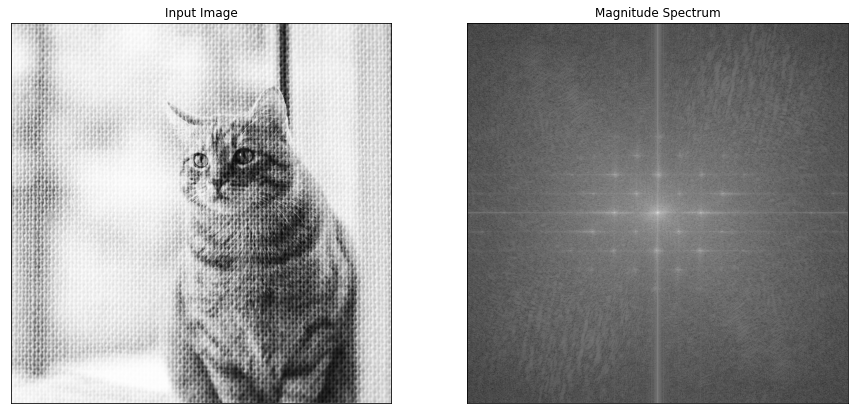

In [2]:
imgP = 'images/poor-cat-trapped-on-canvas.jpg'
img = cv2.imread(imgP, 0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = [np.log(np.abs(z)+1) for z in fshift]

plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

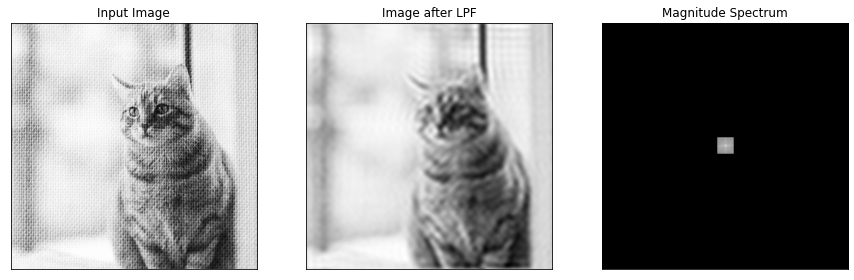

In [3]:
rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
# create a mask first, center square is , remaining all 1
mask = np.zeros((rows, cols), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

fshift = fshift*mask
f_ishift = np.fft.ifftshift(fshift)
img_lpf = np.fft.ifft2(f_ishift)
img_lpf = np.abs(img_lpf)
magnitude_spectrum = [np.log(np.abs(z)+1) for z in fshift]


plt.figure(figsize=(15, 15))
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_lpf, cmap='gray')
plt.title('Image after LPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

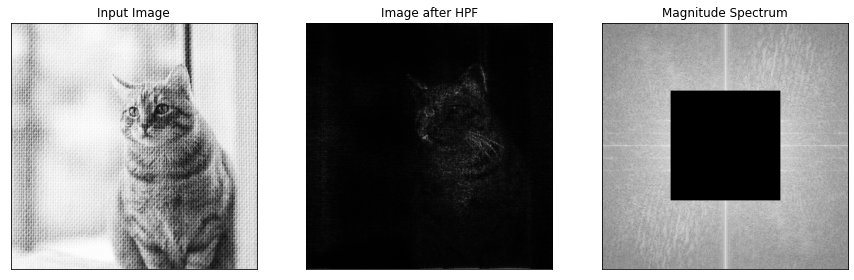

In [4]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
fshift[crow-200:crow+200, ccol-200:ccol+200] = 0
f_ishift = np.fft.ifftshift(fshift)
img_hpf = np.fft.ifft2(f_ishift)
img_hpf = np.abs(img_hpf)
magnitude_spectrum = [np.log(np.abs(z)+1) for z in fshift]

plt.figure(figsize=(15, 15))
plt.subplot(231), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(232), plt.imshow(img_hpf, cmap='gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(233), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

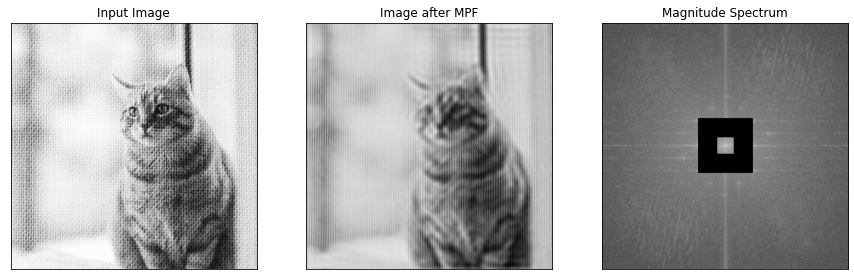

In [5]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

fmid = fshift.copy()
fmid[crow-100:crow+100, ccol-100:ccol+100] = 0
fmid[crow-30:crow+30, ccol-30:ccol+30] = fshift[crow-30:crow+30, ccol-30:ccol+30]

f_ishift = np.fft.ifftshift(fmid)
img_hpf = np.fft.ifft2(f_ishift)
img_hpf = np.abs(img_hpf)
magnitude_spectrum = [np.log(np.abs(z)+1) for z in fmid]

plt.figure(figsize=(15, 15))
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_hpf, cmap='gray')
plt.title('Image after MPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

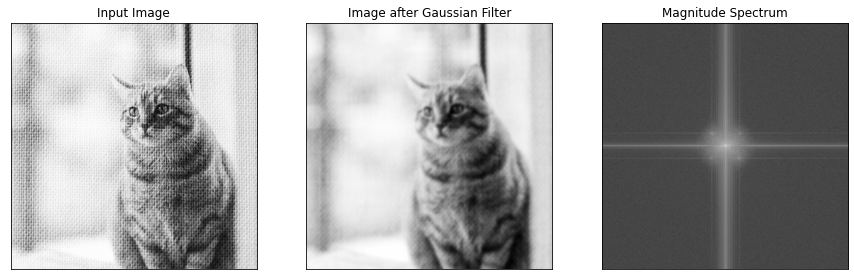

In [6]:
from scipy import ndimage

im_blur = ndimage.gaussian_filter(img, 4)
f = np.fft.fft2(im_blur)
fshift = np.fft.fftshift(f)
magnitude_spectrum = [np.log(np.abs(z)+1) for z in fshift]


plt.figure(figsize=(15, 15))
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(im_blur, plt.cm.gray)
plt.title('Image after Gaussian Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()